## Arboles de Decisión

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt ## graficos
import seaborn as sns

#Librerias para implementar ciencias de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split # dividir dataset
from sklearn.tree import DecisionTreeClassifier, plot_tree # Permite entrenar el arbol de decisión y problemas de clasificación.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [21]:
#cargar el daset
df = pd.read_csv("C:/Users/PERSONAL/Documents/winequality-red.csv") #Lectura de datos en Phyton y se carga en variable df


In [23]:
df.head(10) #Mostrar las primeras 10 filas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [25]:
df.shape # Muestra los datos que se cargaron 


(1599, 12)

In [27]:
df.describe()  #Estadistica de las variables

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [29]:
df.isna().sum()
#Verificación de valores nulos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

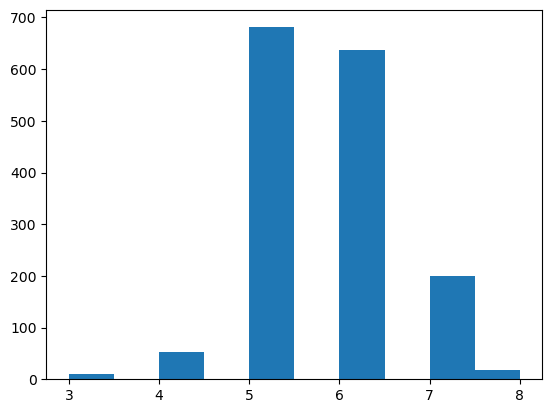

In [31]:
plt.hist(df.quality) # Histograma cuantos elementos hay de cada clase. variable "quality" calidad del vino


In [33]:
## Podemos observar la calidad del vino en el histograma que el dataset se encuentra balanceado en la cantidad superior en el número cinco y seis


<Axes: xlabel='fixed acidity', ylabel='residual sugar'>

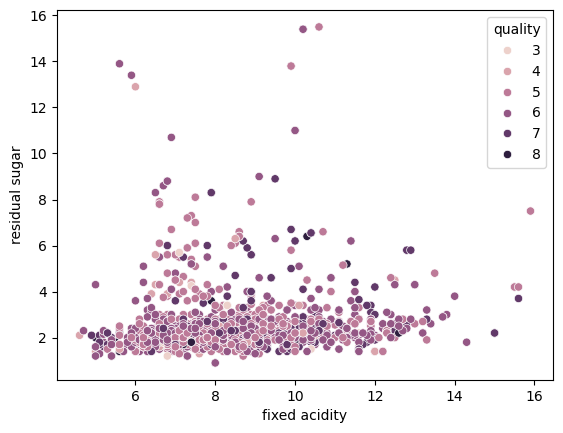

In [37]:
sns.scatterplot(x = 'fixed acidity', y= 'residual sugar', hue ='quality', data = df) #Diagrama de dispersión variables  acidez fija, azucar residual determinando la calidad

<Axes: xlabel='citric acid', ylabel='chlorides'>

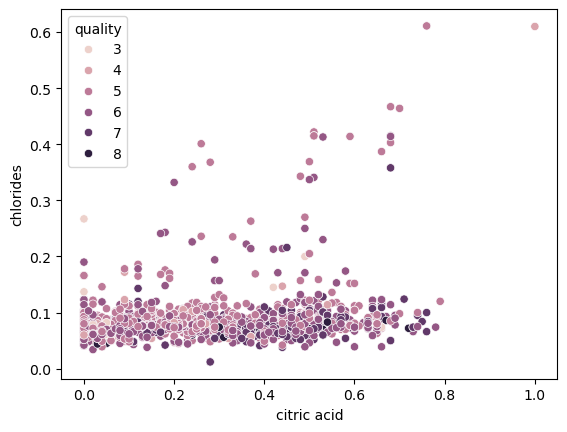

In [39]:
sns.scatterplot(x = 'citric acid', y= 'chlorides', hue ='quality', data = df) #Diagrama de dispersión variables  acidez citrica, 
#cloruros determinando la calidad

## La mayoría de los vinos tienen bajo contenido de cloruros (chlorides), concentrados entre 0.05 y 0.15. Los valores de ácido cítrico (citric acid) también se concentran entre 0.0 y 0.5. Se encuentran dispersos. Los colores indican la calidad del vino. Vemos que: Las calidades 5 y 6 son las más frecuentes, ya que predominan en el gráfico.Las calidades 7 y 8 aparecen más hacia el centro y en menor proporción. Las calidades 3 y 4 también están presentes pero son menos comunes. La calidad del vino no parece estar fuertemente influenciada solo por citric acid y chlorides.

Y la primera indica que que muchos vinos tienen niveles moderados de acidez y azúcar residual. Los vinos de calidad 5 y 6 predominan, lo cual es consistente con tu nota anterior de que el dataset está balanceado hacia esos valores. Se observan valores de azúcar residual que llegan hasta 15, que podrían considerarse valores atípicos.Aunque a simple vista parece que a mayor residual sugar, la calidad no aumenta necesariamente.

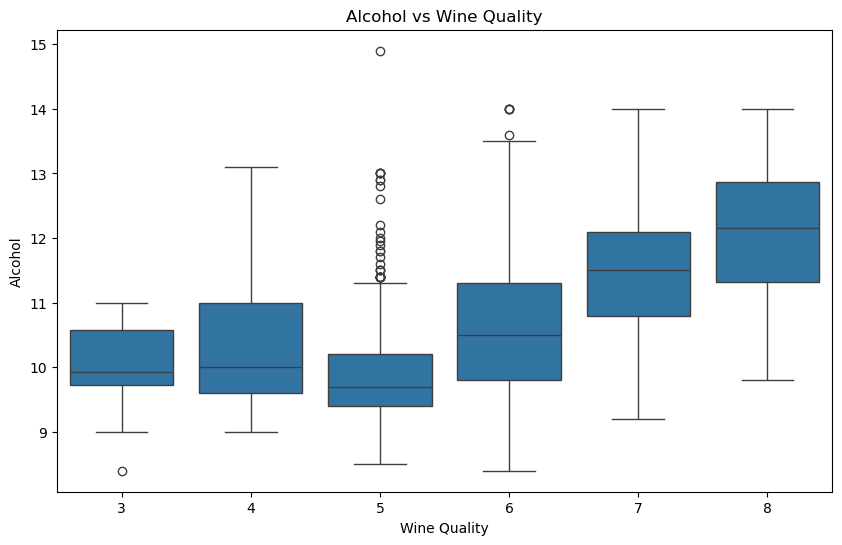

In [46]:
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol')
plt.show()
#IDENTIFICAR VALORES ATIPICOS

Este gráfico te permite ver cómo varía el nivel de alcohol según la calidad del vino.Distribución de los datos (si están centrados o sesgados),
Outliers (puntos fuera del rango esperado),Tendencias generales.¶


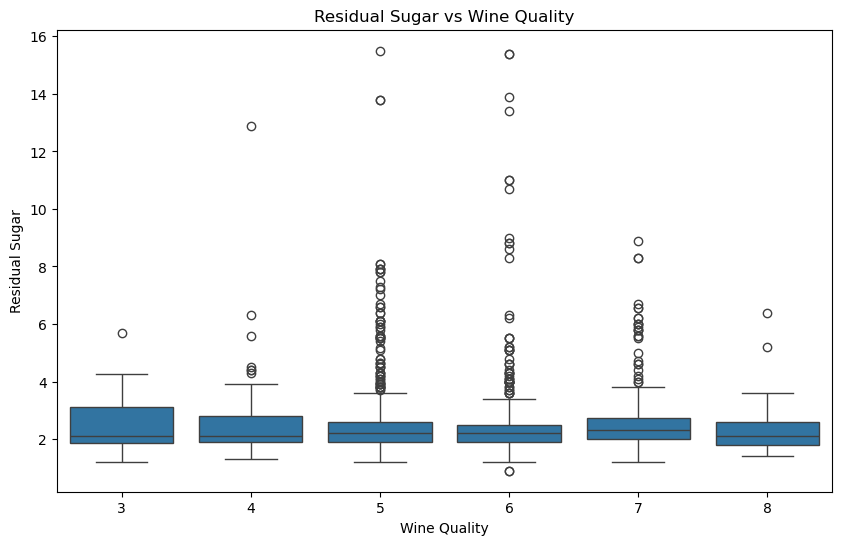

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x='quality', y='residual sugar', data=df)
plt.title('Residual Sugar vs Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Residual Sugar')
plt.show()


La mayoría de las cajas están bastante similares en altura, lo que indica que residual sugar no cambia mucho según la calidad del vino.No hay un aumento o disminución clara de azúcar a medida que sube la calidad.En calidades como 5 y 6, puede que veas algunos outliers (puntos fuera del rango), lo cual indica que hay vinos con mucho más azúcar residual de lo normal.La variable residual sugar no parece tener una relación clara con la calidad del vino. La distribución de azúcar residual es bastante similar para casi todas las calidades, lo que indica que esta característica no es un buen predictor directo de la calidad. Además, se observan algunos valores atípicos que deben ser tenidos en cuenta durante el preprocesamiento.

In [60]:
predictors_col = ['alcohol', 'sulphates', 'volatile acidity', 'citric acid']
target_col = ['quality']
#predicciones y donde queda la columna objetivo que es calidad


In [62]:
predictors = df[predictors_col]
target =df[target_col]
#se dividio dataset

In [66]:
predictors #predicciones valores con las variables escogidas

,alcohol,sulphates,volatile acidity,citric acid
0,9.4,0.56,0.700,0.00
1,9.8,0.68,0.880,0.00
2,9.8,0.65,0.760,0.04
3,9.8,0.58,0.280,0.56
4,9.4,0.56,0.700,0.00
...,...,...,...,...
1594,10.5,0.58,0.600,0.08
1595,11.2,0.76,0.550,0.10
1596,11.0,0.75,0.510,0.13
1597,10.2,0.71,0.645,0.12


In [68]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [70]:
corr = predictors.corr()
corr #correlacion entre las variables númericas que elegi

,alcohol,sulphates,volatile acidity,citric acid
alcohol,1.000000,0.093595,-0.202288,0.109903
sulphates,0.093595,1.000000,-0.260987,0.312770
volatile acidity,-0.202288,-0.260987,1.000000,-0.552496
citric acid,0.109903,0.312770,-0.552496,1.000000


Alcohol: Tiene correlaciones bajas con las otras variables.La correlación más alta es con citric acid (0.11) → positiva pero débil. Con volatile acidity hay una ligera correlación negativa (-0.20). Esto indica que el nivel de alcohol no está fuertemente relacionado con las otras tres variables seleccionadas.Tiene una fuerte correlación negativa con citric acid (-0.55), lo cual es interesante.
Correlaciones negativas con las demás (bajas/moderadas).  Cuando la acidez volátil es alta, el ácido cítrico tiende a ser bajo, lo cual puede afectar el sabor y calidad del vino. La correlación negativa fuerte con volatile acidity (-0.55).  La variable más independiente aquí parece ser alcohol, lo cual es bueno para los modelos.
Hay una correlación negativa fuerte entre volatile acidity y citric acid, así que podrías elegir solo una de ellas para evitar multicolinealidad si quieres simplificar el modelo.
En general, estas variables no están muy correlacionadas entre sí, por lo que es válido usarlas como predictores en el árbol de decisión.

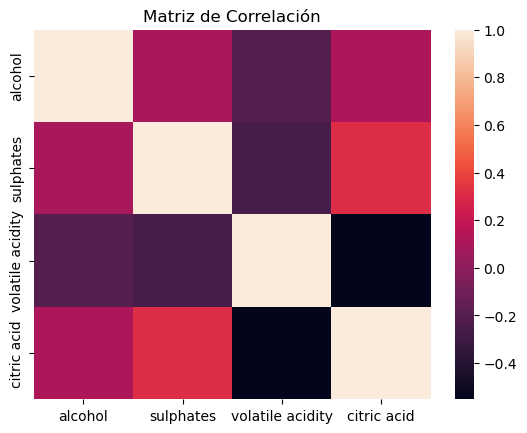

In [72]:
sns.heatmap(corr)
plt.title('Matriz de Correlación')
plt.show() #Grafica no datos númericos como la parte superior .

In [76]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

#entrenamiento y test #random_State cada vez que se ejecte se genere un valor aleatorio.

In [80]:
tree = DecisionTreeClassifier()
# creamos arbol de decision

In [82]:
arbol = tree.fit(X_train, y_train) #entrenar el arbol de decisión

[Text(0.497307565564229, 0.9772727272727273, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.15972935497124074, 0.9318181818181818, 'x[1] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.3285184602677349, 0.9545454545454546, 'True  '),
 Text(0.03670227334976719, 0.8863636363636364, 'x[2] <= 0.335\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.008764721993974253, 0.8409090909090909, 'x[3] <= 0.375\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.004382360996987127, 0.7954545454545454, 'x[0] <= 9.4\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2, 0, 0, 0]'),
 Text(0.0021911804984935633, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.00657354149548069, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.01314708299096138, 0.7954545454545454, 'x[0] <= 9.75\ngini = 0.375\nsamples = 8\nvalue = [0, 0, 2, 6, 0, 0]'),
 Text(0

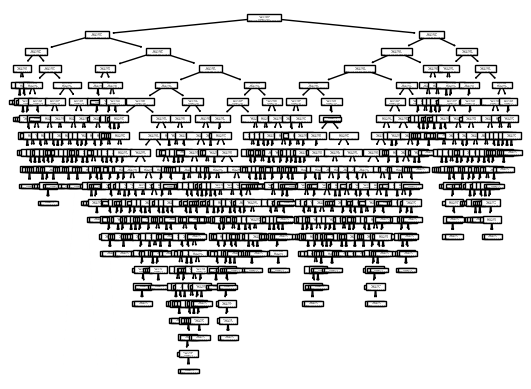

In [84]:
plot_tree(arbol)

In [86]:
predicciones = arbol.predict(X_test)

In [88]:
# Datos que el modelo no conoce para identificar predicciones, 20% restante
predicciones 

array([8, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 5, 6, 7, 6, 6, 7, 5, 7, 5, 5,
       6, 5, 6, 5, 5, 5, 5, 7, 6, 7, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 4, 6, 5, 6, 6, 5, 4, 6, 5, 7, 6, 5, 7, 6, 5, 5, 6, 5, 6, 7, 7,
       6, 6, 5, 5, 6, 5, 7, 6, 5, 4, 5, 5, 5, 5, 6, 8, 6, 5, 6, 6, 6, 6,
       7, 6, 7, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 7, 5, 5, 7, 6, 5, 6, 5, 6,
       6, 7, 6, 4, 5, 6, 7, 7, 4, 7, 7, 4, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 6, 7, 5, 6, 7, 6, 5, 3, 6, 6, 5, 6, 5, 5, 5, 5, 8, 6, 5,
       5, 5, 6, 4, 6, 6, 7, 6, 6, 4, 6, 7, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 6,
       6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 6, 7, 5, 5, 6, 7, 5, 6, 8, 5, 7,
       5, 6, 6, 5, 6, 6, 5, 4, 6, 7, 6, 5, 6, 4, 5, 6, 6, 3, 6, 5, 6, 6,
       6, 6, 5, 6, 7, 5, 5, 6, 6, 5, 5, 5, 7, 6, 4, 7, 5, 7, 4, 6, 6, 5,
       6, 5, 6, 7, 7, 6, 7, 5, 5, 5, 7, 5, 5, 6, 5, 5, 5, 6, 7, 5, 7, 5,
       6, 7, 5, 5, 5, 6, 5, 4, 5, 6, 5, 6, 5, 6, 6,

In [90]:
# Examinamos la matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,2,2,3,1,0
5,2,4,95,35,10,0
6,0,6,25,73,17,3
7,0,1,1,13,19,1
8,0,0,0,6,0,0


Clase 5 (Predominante): 95 predicciones correctas. Errores frecuentes: se confunde con clase 6 (35 veces) y clase 7 (10 veces). Aunque el modelo predice bien la clase 5, tiende a equivocarse con clases cercanas (6 y 7), lo cual es normal cuando las clases tienen valores ordinales.

Clase 6: 73 aciertos. Clase intermedia, difícil para el modelo. Hay mucha mezcla con las clases vecinas.

Clase 7: Solo 19 aciertos.Difícil de diferenciar con exactitud; puede deberse a poca representación de datos o a similitud de características.

Clase 8: 0 aciertos.  No hay suficientes datos para que el modelo aprenda a reconocer esta clase.

Clase 4: 2 aciertos. Es una clase con bajo rendimiento. Necesitaría más datos para mejorar.

El modelo tiene mejor rendimiento con clases intermedias como 5 y 6, donde hay más datos disponibles. Hay una tendencia a confundir clases vecinas, lo cual es común en variables ordinales como la calidad del vino.

In [98]:
accuracy = accuracy_score(y_test, predicciones)
accuracy #Comparar valores reales con predicciones

0.590625

La proporción de predicciones correctas en comparación con el total de predicciones. Eso quiere decir que tu modelo acertó en aproximadamente el 59% de los casos al predecir la calidad del vino en los datos de prueba.

In [102]:
precision = precision_score(y_test, predicciones, average= 'weighted')
precision #metrica

0.6152041041919645

Cuántas de las predicciones positivas que hizo el modelo fueron realmente correctas. Un 61.5% indica que, en promedio ponderado, el modelo acierta un poco más de 6 de cada 10 veces cuando afirma que un vino pertenece a cierta calidad.

In [104]:
recall = recall_score(y_test, predicciones, average= 'weighted')
recall # verdaderos positivos

0.590625

Qué proporción de los valores reales fue correctamente identificada por el modelo.l modelo tiene un comportamiento equilibrado, especialmente si hay una fuerte clase dominante (como calidad 5, por ejemplo).

In [106]:
f1 = f1_score(y_test, predicciones, average= 'weighted')
f1 # metricas 

0.5992489156589167

Equilibrio entre precision y recall: rendimiento general moderado.El F1-score es una media armónica entre precision y recall, lo que significa que evalúa qué tan bien el modelo logra balancear ambos aspectos.